# Using pre-trained models

Adapted from https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub.

In [6]:
!pip install tensorflow_hub

In [7]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard

In [29]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

In [30]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

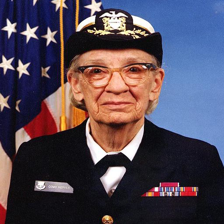

In [43]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper



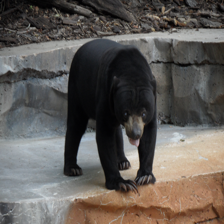

In [46]:
image2 = Image.open("sam_2638.jpg") 
image2 = image2.resize(IMAGE_SHAPE)
image2

In [47]:
image2 = np.array(image2)/255.0
image2.shape

(224, 224, 3)

In [48]:
result = classifier.predict(image2[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 115ms/step


(1, 1001)

In [49]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=296>

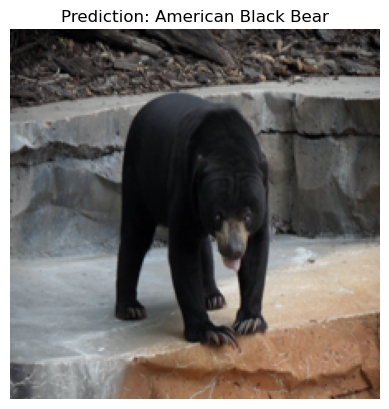

In [51]:
plt.imshow(image2)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# EXERCISE: what happens if you predict without normlising the image?

In [32]:
result = classifier.predict(np.array(grace_hopper)[np.newaxis, ...])
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

2023-09-05 11:25:37.141565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 524ms/step


<tf.Tensor: shape=(), dtype=int64, numpy=722>

In [33]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

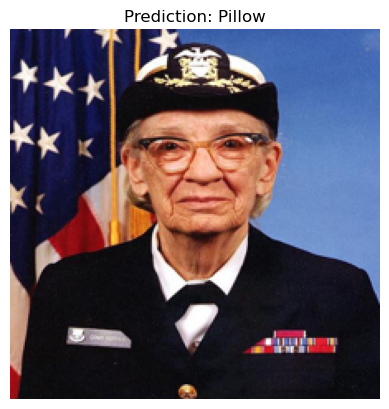

In [34]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# Predict with normalisation of the image

In [35]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [36]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

2023-09-05 11:26:02.984099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 586ms/step


(1, 1001)

In [37]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=653>

In [38]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

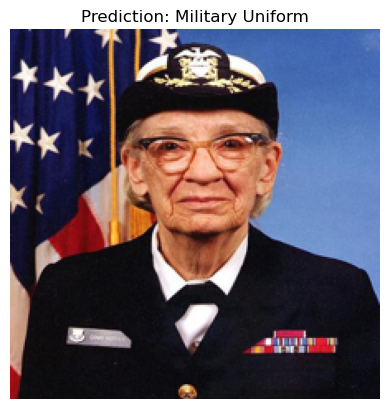

In [39]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# TEST THE MODEL WITH AN IMAGE OF YOUR CHOICE

Do the following tasks:

1) Find an image on internet.
2) Classify it using the pre-trainde models loaded.